# Penrose Tilings: A Lesson in Objects (continued)<a name="top"> </a>

## Penrose Module and Import

In the previous notebook we wrote Class definitions for Kite and Dart. We also defined the super-class called Tile that exhibited the common aspects of Kites and Darts. The methods on Tiles are <i>inherited</i> by the sub-classes --- inheritance is a key feature of O-O design. The methods on the Tile class include operations like <i>translate</i> and <i>rotate</i> since those operations act on Kites and Darts in the same way. By contrast, the methods to instantiate Kites and Darts and to draw them were coded specifically for those classes.

If we are going to write multiple notebooks (or programs) using Penrose tiles, we do not want to copy and paste the Class definitions into new code every time we create a new notebook or file. We find a better solution consists of saving the Class definitions, plus the definitions of some constants like <tt>phi</tt> and rotation matrix <tt>m</tt>, in a <i>Module</i>. That is we put the code into a Python script <tt>Penrose.py</tt> and use the <tt>import</tt> command to load the definitions into memory.  Having a single source for the code means that we only have to maintain one file; all other files import the common code.

Even if you do not code up Object Classes, you may find that you have written Python functions or constants that you use again and again in your data analysis, it is better to place those functions in a Module and import them into code that you are actively working on.  The function definitions and constants remain relatively stable over time even as your active code changes regularly.

In [1]:
# You need to have Penrose.py in your PATH. The easiest way to ensure this
# is to place it in the same directory as the Python notebook importing it.
import Penrose
from Penrose import Kite, Dart

In [2]:
# Even though Penrose.py imports matplotlib, we still need matplotlib 
# in our main program to customize the plots
import matplotlib.pyplot as plt  

Note that we have imported the constructors <tt>Kite</tt> and <tt>Dart</tt> directly into the main namespace, but to access other aspects of the Penrose module we will have to prefix those names with <tt>Penrose</tt>; e.g. <tt>Penrose.phi</tt>.   

In [3]:
Penrose.phi

1.618033988749895

Note that for any module you can use the <tt>dir()</tt> function to see what has been imported.

In [4]:
dir(Penrose)
# dir(Kite)

['Dart',
 'Kite',
 'Tile',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ace',
 'deuce',
 'e1',
 'e2',
 'jack',
 'king',
 'm',
 'matrix_power',
 'norm',
 'np',
 'phi',
 'plt',
 'queen',
 'star',
 'sun',
 'theta',
 'vec0']

The object classes are in the module directory as are constants phi, the vectors e1, e2, vec0, and matrix m. We have saved the defintions of vertex tilings ace, deuce, etc. to the module as well.  The names of modules called by Penrose.py --- numpy as np, matplotlib.pyplot as plt --- are listed too.

In [5]:
# Uncomment the following line to see what it does.
# Penrose?

Let's return to the basic shapes of the Kite and Dart.

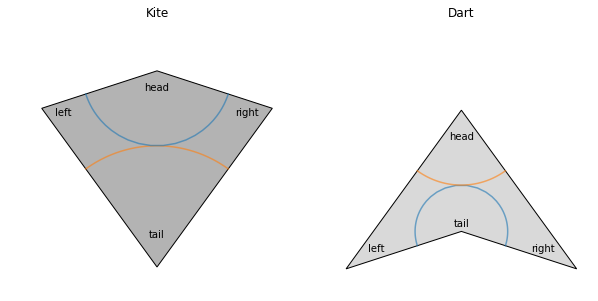

In [6]:
simple_kite = Kite(orient=3)
simple_dart = Dart(orient=13)

plt.subplots(1,2,figsize=(10,5));
ax1 = plt.subplot(121)
simple_kite.draw(fill=True,arcs=True)
plt.text(simple_kite.head[0],simple_kite.head[1]-0.1,'head',horizontalalignment='center')
plt.text(simple_kite.tail[0],simple_kite.tail[1]+0.15,'tail',horizontalalignment='center')
plt.text(simple_kite.right[0]-0.07,simple_kite.right[1]-0.04,'right',horizontalalignment='right')
plt.text(simple_kite.left[0]+0.07,simple_kite.left[1]-0.04,'left',horizontalalignment='left')
plt.axis('square');
ax1.axis('off');
plt.title('Kite');

ax2 = plt.subplot(122)
simple_dart.draw(fill=True,arcs=True)
plt.text(simple_dart.head[0],simple_dart.head[1]-0.15,'head',horizontalalignment='center')
plt.text(simple_dart.tail[0],simple_dart.tail[1]+0.025,'tail',horizontalalignment='center')
plt.text(simple_dart.right[0]-0.11,simple_dart.right[1]+0.085,'right',horizontalalignment='right')
plt.text(simple_dart.left[0]+0.11,simple_dart.left[1]+0.085,'left',horizontalalignment='left')
plt.axis('square');
ax2.axis('off');
plt.title('Dart');

We have placed the definitions of the seven vertex tilings (which are unique up to rotations and translations) in the Penrose module too.

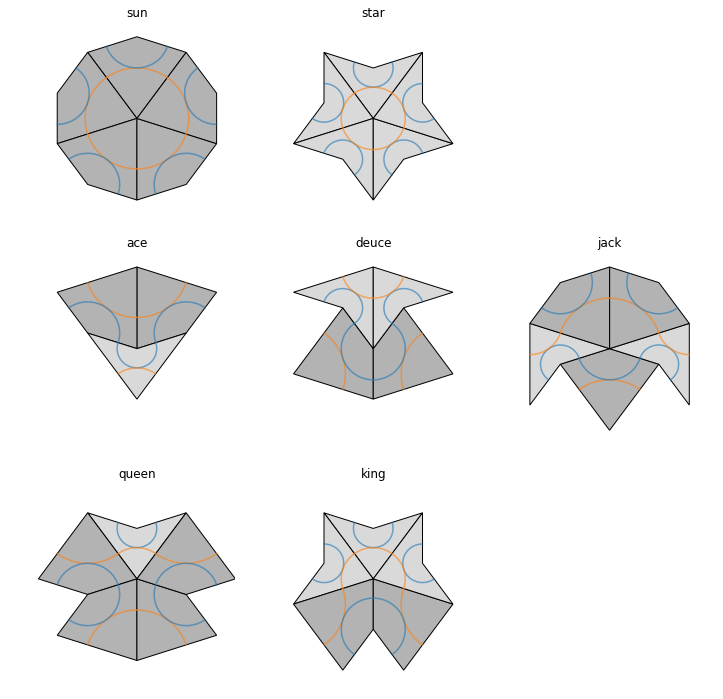

In [7]:
plt.subplots(3,3,figsize=(12,12))
vertex_tilings = [Penrose.sun, Penrose.star, Penrose.ace, Penrose.deuce, Penrose.jack, Penrose.queen, Penrose.king]
vertex_tiling_labels = ['sun', 'star', 'ace', 'deuce', 'jack', 'queen', 'king']
for i,tiling in enumerate(vertex_tilings):
    j = i+1 if i < 2 else i+2
    plt.subplot(3,3,j)
    [t.draw(fill=True,arcs=True) for t in tiling]
    plt.axis([-1.175,1.175,-1.175,1.175])
#     plt.axis('square');
    plt.axis('off');
    plt.title(vertex_tiling_labels[i])
plt.subplot(333)
plt.axis('off');
plt.subplot(339)
plt.axis('off');

Note that when you import a module, the code in the script is executed by the Python interpreter.  If you edit the module file (in this case Penrose.py), you will not see those changes reflected in your notebook even if you execute the command <tt>import Penrose</tt> after making your edits. The interpreter only imports a file once; you need to use the <tt>reload</tt> command. In Python2 <tt>reload</tt> is a built-in function; in Python3 <tt>reload</tt> must be imported from the module <tt>imp</tt>. The code in the following cell will reload the module after you have made changes to the file and saved it.

In [8]:
# from imp import reload
# reload(Penrose)

## Inflation and Other New Tile Methods

If you examine the code in Penrose.py, you will notice that there are several new methods defined that were not introduced in the previous notebook. Kite and Dart each have a method named <tt>inflate</tt> which returns a <i>list of Kites and Darts</i>.  Inflation is just about locating the head of any new Darts and the tail of any new Kite relative to the current object.  In the email, I included diagrams with Half-Darts, but I did not include them in the Penrose module because it is easier to deal with full Darts (although this has other implications as we shall see).

Here is what each method does: 

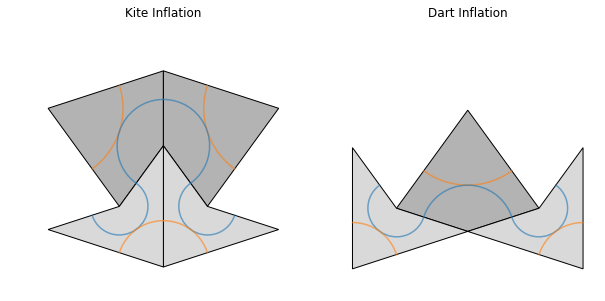

In [9]:
plt.subplots(1,2,figsize=(10,5));
plt.subplot(121)
[new_tile.draw(fill=True,arcs=True) for new_tile in simple_kite.inflate()]
plt.axis('square');
plt.axis('off');
plt.title('Kite Inflation');
plt.subplot(122)
[new_tile.draw(fill=True,arcs=True) for new_tile in simple_dart.inflate()]
plt.axis('square');
plt.axis('off');
plt.title('Dart Inflation');

plt.savefig('Full-Dart-Inflation.png')

You can verify that including full Darts, as opposed to Half-Darts, never generates a set of tiles that is not valid.  However, let's take this one step further. Every Dart <b>forces</b> an Ace at its tail vertex. We may as well fill these in too! My opinion is that this is esthetically pleasing to be rid of the ragged edges caused by the extra Half-Darts.  The following cell gives the result where we use the <tt>fill_ace</tt> option to the <tt>inflate</tt> method.

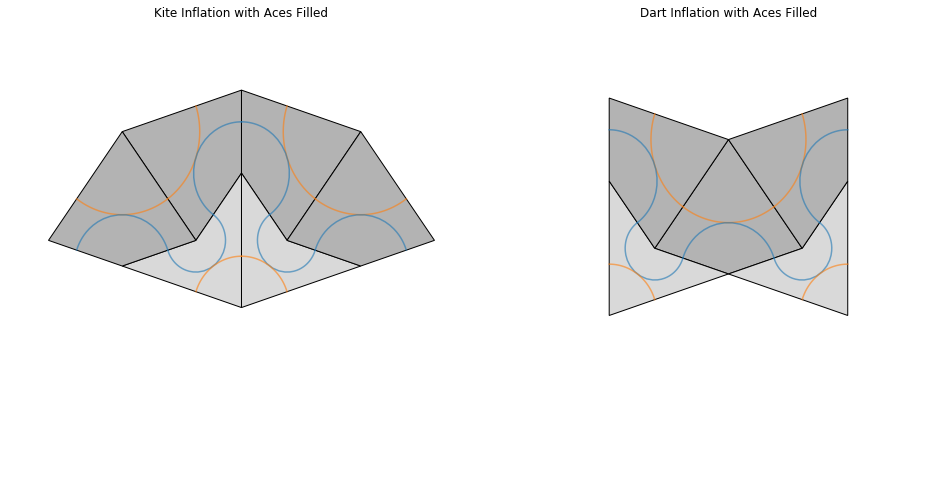

In [10]:
a = [-Penrose.phi,Penrose.phi,-Penrose.phi,Penrose.phi]
plt.subplots(1,2,figsize=(16,8));
plt.subplot(121)
[new_tile.translate(-0.5*Penrose.e2).draw(fill=True,arcs=True) for new_tile in simple_kite.inflate(fill_ace=True)]
plt.axis(a);
plt.axis('off');
plt.title('Kite Inflation with Aces Filled');

plt.subplot(122)
[new_tile.translate(0.75*Penrose.e2).draw(fill=True,arcs=True) for new_tile in simple_dart.inflate(fill_ace=True)]
plt.axis(a);
plt.axis('off');
plt.title('Dart Inflation with Aces Filled');
plt.savefig('Full-Dart-Inflation-Fill-Ace.png')

The following two cells show the differences between using the <tt>fill_ace</tt> option or not.

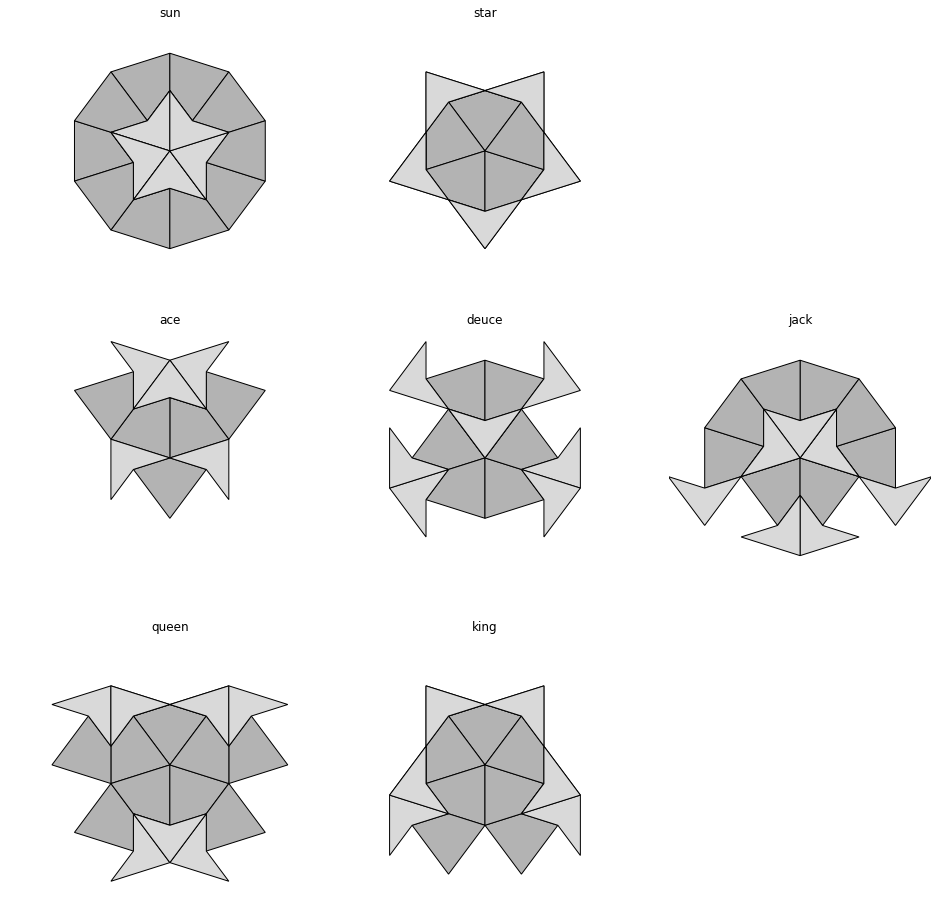

In [11]:
a = (0.5 + Penrose.phi)
my_axis = [-a,a,-a,a]

plt.subplots(3,3,figsize=(16,16))
vertex_tilings = [Penrose.sun, Penrose.star, Penrose.ace, Penrose.deuce, Penrose.jack, Penrose.queen, Penrose.king]
vertex_tiling_labels = ['sun', 'star', 'ace', 'deuce', 'jack', 'queen', 'king']
for i,tiling in enumerate(vertex_tilings):
    j = i+1 if i < 2 else i+2
    plt.subplot(3,3,j)
    inflated_tiles = []
    for t in tiling:
        inflated_tiles.extend(t.inflate(fill_ace=False))
        
    [t.draw(fill=True) for t in inflated_tiles]
    plt.axis(my_axis)
#     plt.axis('square');
    plt.axis('off');
    plt.title(vertex_tiling_labels[i])
plt.subplot(333)
plt.axis('off');
plt.subplot(339)
plt.axis('off');
plt.savefig('Vertex-Tiling-Inflation.png')

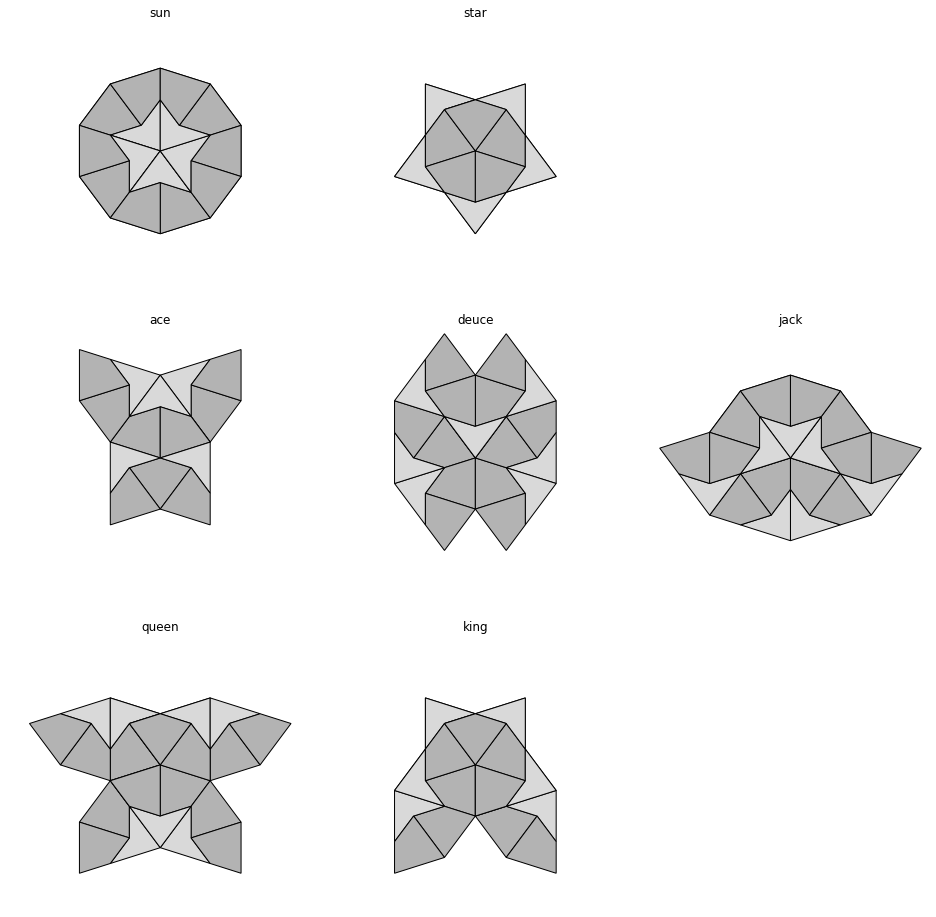

In [12]:
a = 2.5
my_axis = [-a,a,-a,a]

plt.subplots(3,3,figsize=(16,16))
vertex_tilings = [Penrose.sun, Penrose.star, Penrose.ace, Penrose.deuce, Penrose.jack, Penrose.queen, Penrose.king]
vertex_tiling_labels = ['sun', 'star', 'ace', 'deuce', 'jack', 'queen', 'king']
for i,tiling in enumerate(vertex_tilings):
    j = i+1 if i < 2 else i+2
    plt.subplot(3,3,j)
    inflated_tiles = []
    for t in tiling:
        inflated_tiles.extend(t.inflate(fill_ace=True))
        
    [t.draw(fill=True) for t in inflated_tiles]
    plt.axis(my_axis)
#     plt.axis('square');
    plt.axis('off');
    plt.title(vertex_tiling_labels[i])
plt.subplot(333)
plt.axis('off');
plt.subplot(339)
plt.axis('off');
plt.savefig('Vertex-Tiling-Inflation-Fill-Aces.png')

### Eliminating Duplicates

From the diagrams above, we expect 15 tiles after we inflate a Sun (5 Darts and 10 Suns); however, keeping full Darts doubles up on the Darts, and filling aces doubles up on the Kites.

In [13]:
t1 = []
t2 = []
[t1.extend(t.inflate(fill_ace=False)) for t in Penrose.sun]
[t2.extend(t.inflate(fill_ace=True)) for t in Penrose.sun]
print(len(t1),len(t2))

20 30


Keeping full Darts from Inflation and completing the Aces generates quite a few tiles that are duplicates. We need a way to determine when two tiles are the same. To eliminate duplicates we implement a new method <tt>\__eq\__</tt>. This is a Tile method since the method would be the same for Kites and Darts. When we type the expression <tt>tile1 == tile2</tt>, the interpreter translates this to <tt>tile1.\__eq\__(tile2)</tt>. 

There are quite a few ways to define equality; this is simply one implementation.  We assume that the two tiles are from the same Class and that the heads and tails very nearly the same --- within 1% relative to the scale.  The vertices are given by floats; so asking for strict equality at the vertices would be too strong a requirement. However, you can examine the Tile class in Penrose.py to see how I have done it.

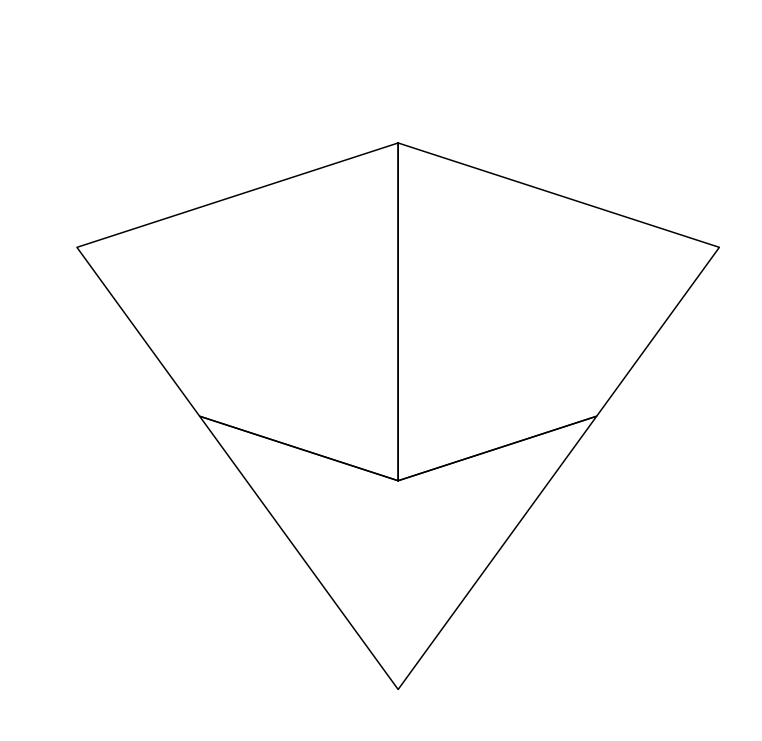

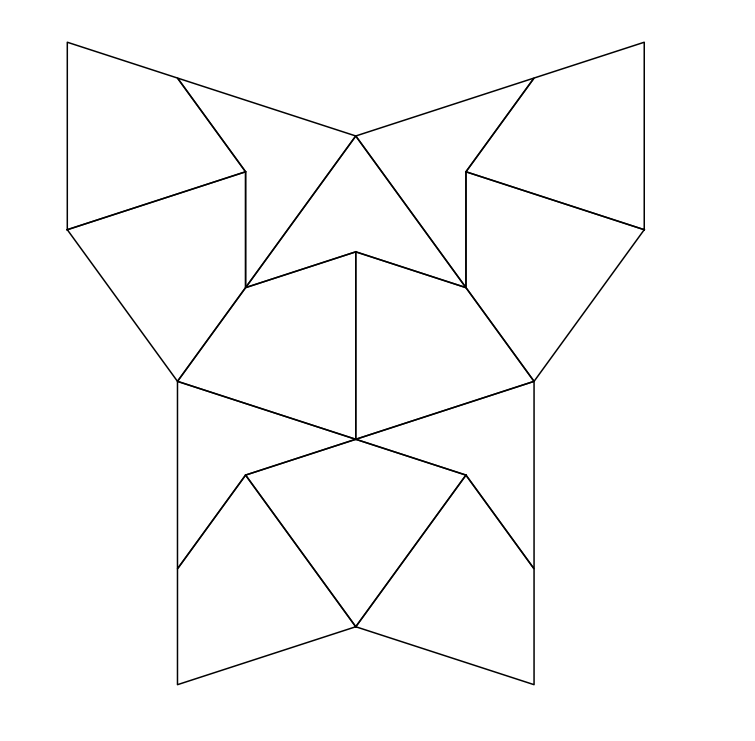

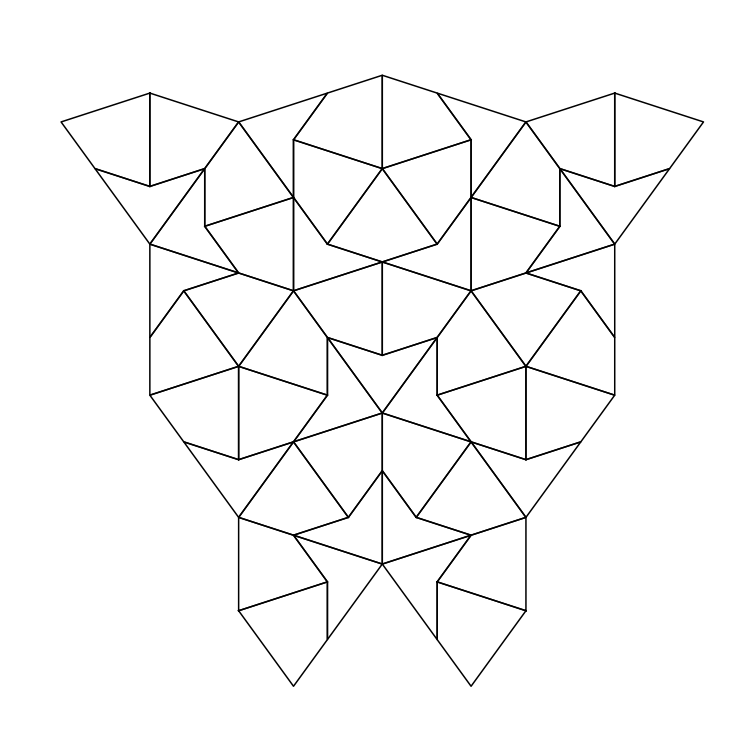

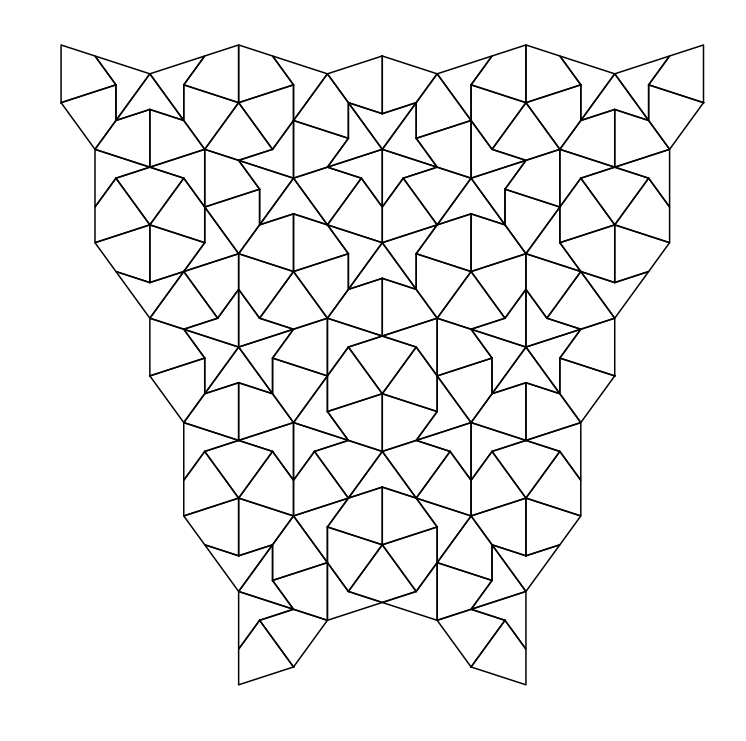

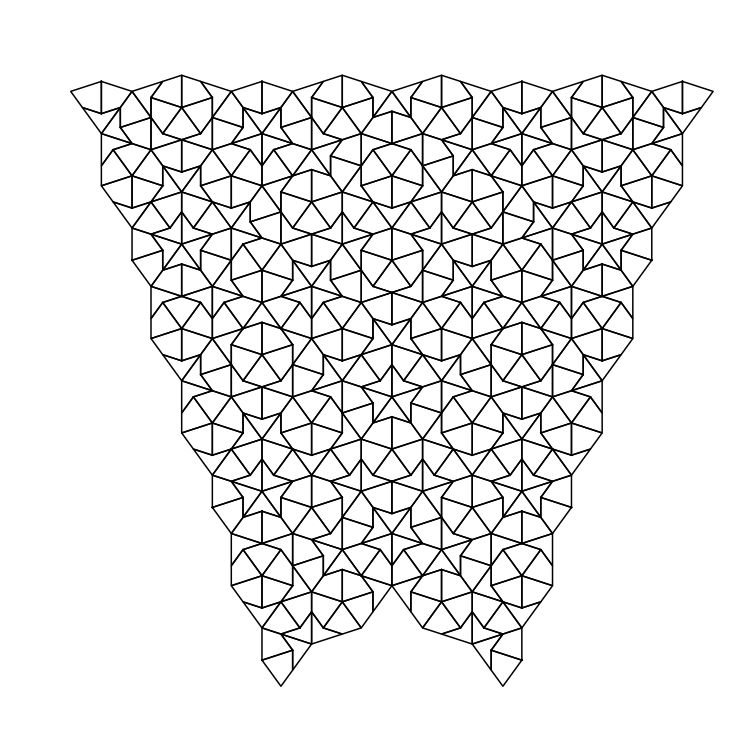

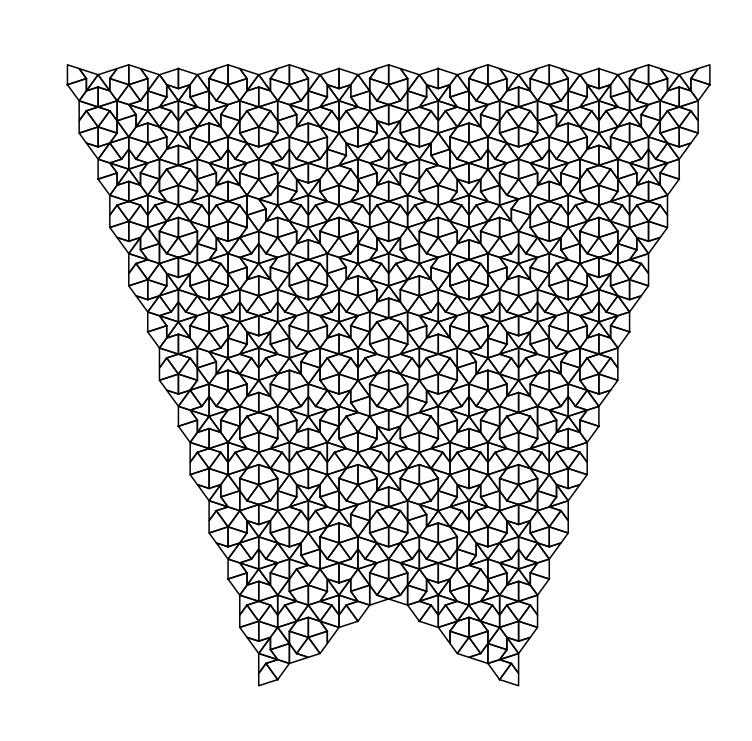

In [14]:
# Eliminating duplicates takes time, but, if you don't eliminate duplicates, 
# the number of tiles grows faster with each iteration. 

# If you execute this notebook, use the Esc-o twice to toggle through the 
# different ways to display long output cells.

# write_figs = True
write_figs = False
# We define three tilings:
# Initial tiling
tiling = Penrose.ace
# Intermediate tiling with duplicates
inflated_tiling = []
# Final tiling without duplicates
new_tiling = []

plt.figure(figsize=(13,13));
#  Draw without arcs or fill. Otherwise, the plots are very busy!
[t.draw() for t in tiling]
plt.axis('square');
plt.axis('off');

for i in range(1,6):
# The extend method adds tiles to inflated tiles without regard to duplication.
    for t in tiling:
        inflated_tiling.extend(t.inflate(fill_ace=True))
        
# The following code consists of two loops. In the outer loop, 
# it grabs tile1 from inflated_tiling. In the inner loop,
# it grabs tile2 from new_tiling (unless it's empty) and compares
# tile1 to tile2. If they are the same, it "discards" tile1, breaking
# of the inner loop, getting the next tile from inflated_tiles. 
# If the inner loop is completed without matching tile1 to any tile2,
# then tile1 is appended to new_tiling.
    for tile1 in inflated_tiling:
        j = len(new_tiling)
        if j==0:
            new_tiling.append(tile1)
        else:
            match = False
            for k in range(j):
                tile2 = new_tiling[k]
                if tile1 == tile2:
                    match = True
                    break
            if match == False:
                new_tiling.append(tile1)
                
# Reset the lists with the tilings for the outermost loop.
    tiling=new_tiling
    inflated_tiling = []
    new_tiling = []

    plt.figure(figsize=(13,13));
#  Draw without arcs or fill. Otherwise, the plots are very busy!
    [t.draw() for t in tiling]
    plt.axis('square');
    plt.axis('off');
    if write_figs:
        plot_name = f'ace_inflated_{i}_times.png' if i > 1 else f'ace_inflated_{i}_time.png'
        plt.savefig(plot_name)

Finally, there is one additional Tile method that I have coded in Penrose.py to compute the Euclidean distance from a tile to a point. The distance method measures the Euclidean distance from any vector to an instance of a Tile where the Tile's location is given by the "centroid" (i.e.; the mean location of the four vertices). For example, if <tt>k</tt> is a Kite, then <tt>k.distance(Penrose.vec0)</tt> is the distance from the origin, [[0],[0]], to <tt>k.centroid</tt>.

The following cells use the distance function to find some patches that cover "circular" regions in the plane.  These tilings are referred to as <i>cartwheels</i>. Cartwheels or various order (or generation) appear at the center of successive inflations of the Ace. Because every tile is part of an Ace and because you can generate any cartwheel by inflating an ace, in an infinite tiling of the plane every tile is part of a cartwheel of every order! [N.B. To prove this assertion we need to introduce deflation as a counterpart to inflation.]

Penrose Tiles were introduced to a broad audience in the January 1977 issue of <i>Scientific American</i> (<a href="https://www.scientificamerican.com/magazine/sa/1977/01-01/"> https://www.scientificamerican.com/magazine/sa/1977/01-01/</a>) by Martin Gardner in his column <i>Mathematical Games.</i> This article, among others, was reprinted in Gardner's book <i>Penrose Tiles to Trapdoor Ciphers</i> (<a href="https://www.amazon.com/Penrose-Trapdoor-Ciphers-Gardner-1989-01-30/dp/B01K0U6OEA"> https://www.amazon.com/Penrose-Trapdoor-Ciphers-Gardner-1989-01-30/dp/B01K0U6OEA</a>). Chapters 1 and 2 from the book are available for free in a PDF from the MAA <a href="https://www.maa.org/sites/default/files/pdf/pubs/focus/Gardner_PenroseTilings1-1977.pdf"> https://www.maa.org/sites/default/files/pdf/pubs/focus/Gardner_PenroseTilings1-1977.pdf</a>

The following cells consist of drawing the Cartwheels at the center of the fifth iteration of inflation of an Ace.  The first Cartwheel (order 0) covers a decagon and features a patch at the center that is called a <i>Batman</i> which I have filled in with steel blue.  Note that if you inflate a Cartwheel, you get another Cartwheel, although it is flipped over.

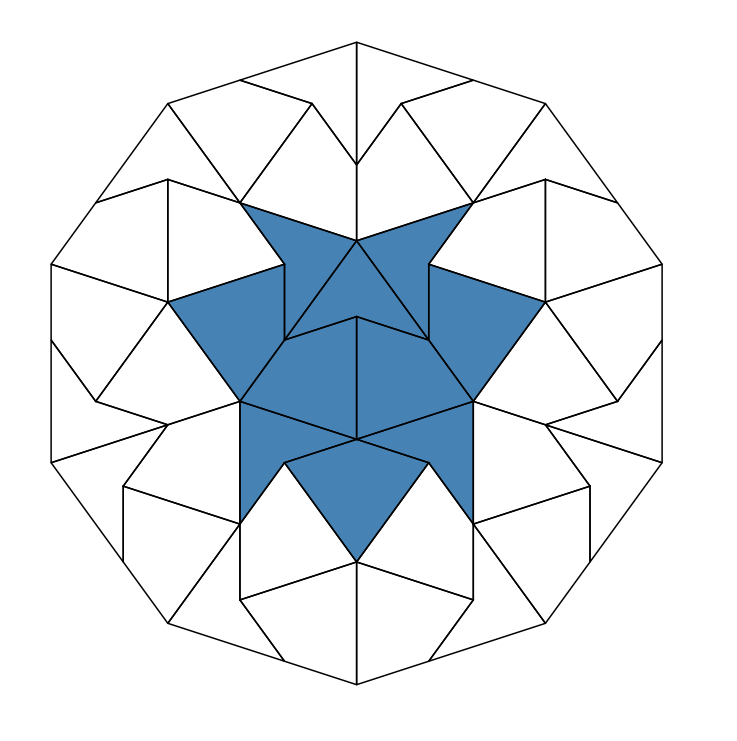

In [15]:
# This code assumes you start with and ace and inflate it 5 times.
# More specifically, the value of <tt>tiling</tt> at the end of 
# the last input cell.
subset_tiling = [tile for tile in tiling if tile.distance(4.225*Penrose.e2) < 2.8]

fig, ax = plt.subplots(figsize=(13,13));
[t.draw() for t in subset_tiling]
ax.axis('square');
ax.axis('off');
plt.savefig(f'cartwheel_{len(subset_tiling)}.png')
# There is a fill method for tiles as well as draw, and you can pass keyword arguments to fill.
[t.fill(facecolor='steelblue') for t in subset_tiling if t.distance(4.225*Penrose.e2) < 1.4];

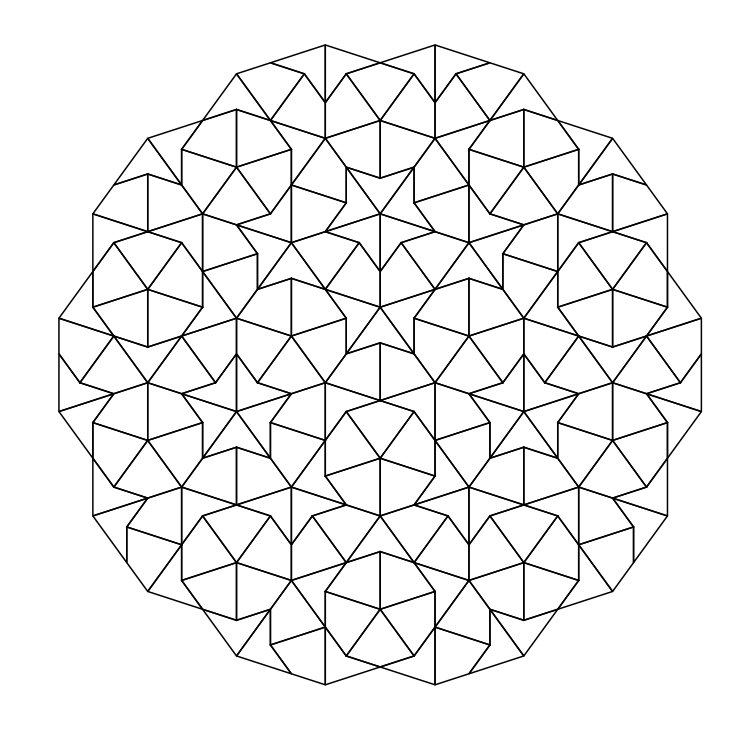

In [16]:
# This code assumes you start with and ace and inflate it 5 times.

subset_tiling = [tile for tile in tiling if tile.distance(4.225*Penrose.e2) < 5.7]

fig, ax = plt.subplots(figsize=(13,13));
[t.draw(arcs=False) for t in subset_tiling]
ax.axis('square');
ax.axis('off');
plt.savefig(f'cartwheel_{len(subset_tiling)}.png')

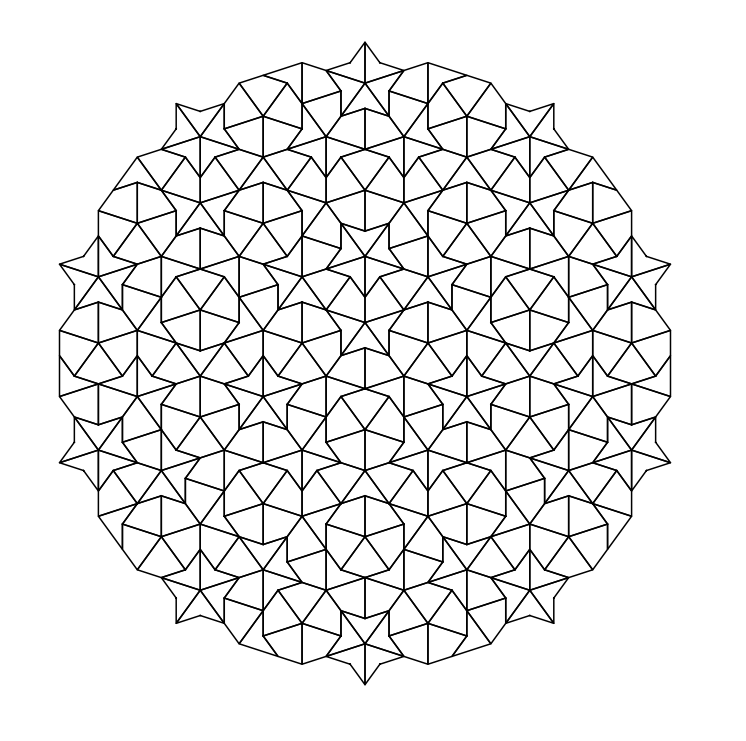

In [17]:
# This code assumes you start with and ace and inflate it 5 times.

subset_tiling = [tile for tile in tiling if tile.distance(4.225*Penrose.e2) < 7.5]

fig, ax = plt.subplots(figsize=(13,13));
[t.draw(arcs=False) for t in subset_tiling]
ax.axis('square');
ax.axis('off');
plt.savefig(f'cartwheel_{len(subset_tiling)}.png')

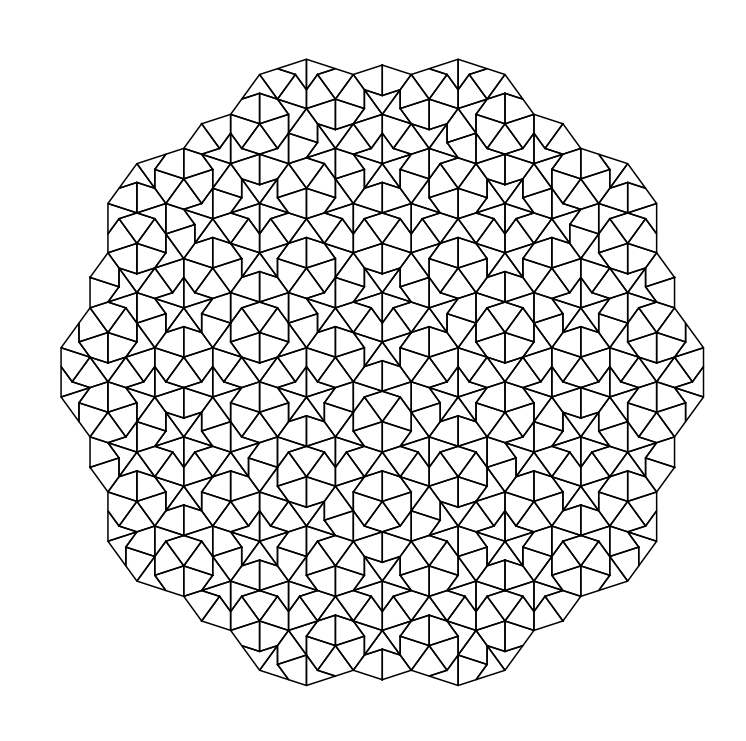

In [18]:
# This code assumes you start with and ace and inflate it 5 times.

subset_tiling = [tile for tile in tiling if tile.distance(4.225*Penrose.e2) < 10.236]

fig, ax = plt.subplots(figsize=(13,13));
[t.draw(arcs=False) for t in subset_tiling]
ax.axis('square');
ax.axis('off');
plt.savefig(f'cartwheel_{len(subset_tiling)}.png')
plt.savefig(f'cartwheel_{len(subset_tiling)}.pdf')

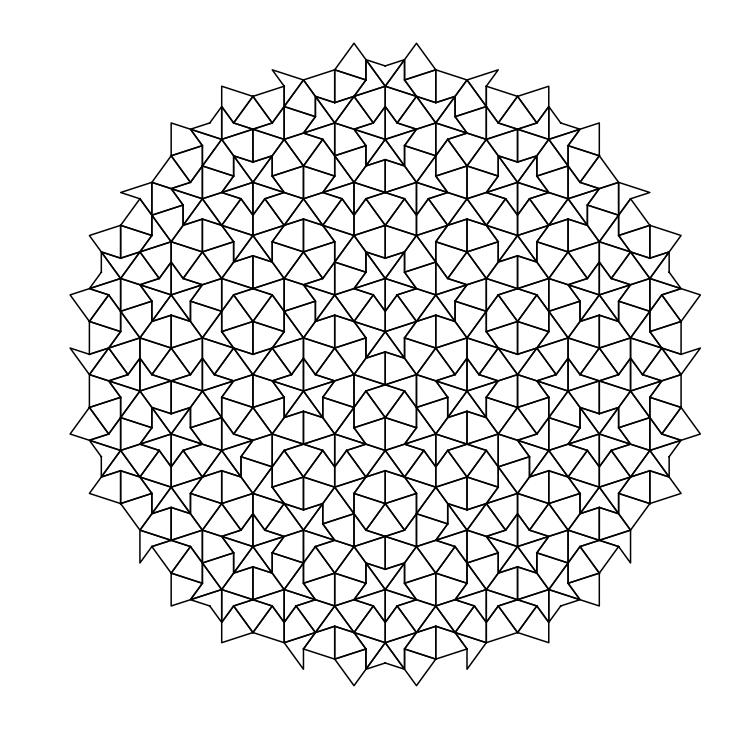

In [19]:
# This code assumes you start with and ace and inflate it 5 times.

subset_tiling = [tile for tile in tiling if tile.distance(4.225*Penrose.e2) < 9.4]

fig, ax = plt.subplots(figsize=(13,13));
[t.draw(arcs=False) for t in subset_tiling]
ax.axis('square');
ax.axis('off');
plt.savefig(f'cartwheel_{len(subset_tiling)}.png')

In [20]:
# This function could be added to the module as a Tile method.
# Instead I have opted to pass the tile in as an argument.
def taxi_distance(tile,vec):
    return max(abs(tile.centroid - vec))

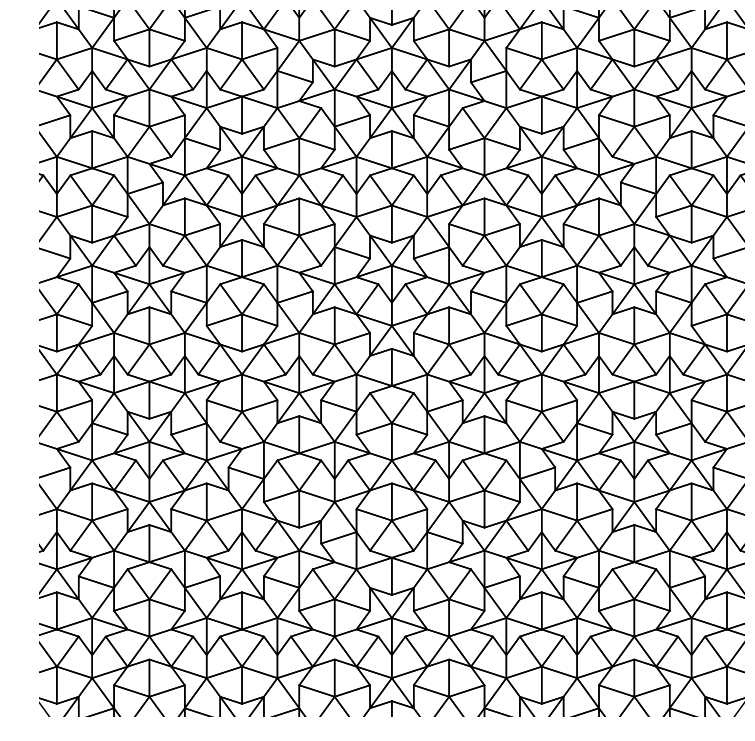

In [21]:
# This code assumes you start with and ace and inflate it 5 times.
subset_tiling = [tile for tile in tiling if taxi_distance(tile,4.225*Penrose.e2) < 10.25]

plt.figure(figsize=(13,13));
[t.draw(arcs=False) for t in subset_tiling]
plt.axis('square');
plt.axis([-9.5,9.5,-5.275,13.725]);
plt.axis('off');
plt.savefig(f'rectangle_{len(subset_tiling)}.png')
plt.savefig(f'rectangle_{len(subset_tiling)}.pdf')

I added a fill method for Tiles. You can use the <tt>**kwargs</tt> to pass face and edge colors. Here are some color references:  <ul>
    <li>X11 color names: <a href="https://en.wikipedia.org/wiki/X11_color_names">
        https://en.wikipedia.org/wiki/X11_color_names</a></li>
    <li>Matplotlib color specification: <a href="https://matplotlib.org/3.1.1/tutorials/colors/colors.html">
        https://matplotlib.org/3.1.1/tutorials/colors/colors.html</a></li>
    <li>xkcd color survey: <a href="https://xkcd.com/color/rgb/">
        https://xkcd.com/color/rgb/</a></li>
    </ul>
You can specify colors by name or RGB value.

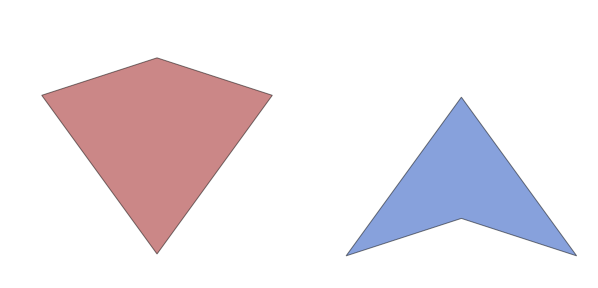

In [22]:
simple_kite = Kite(orient=3)
simple_dart = Dart(orient=13)

plt.subplots(1,2,figsize=(10,5));
ax1 = plt.subplot(121)
simple_kite.fill(facecolor='#991010',edgecolor='k',alpha=0.5);
plt.axis('square');
ax1.axis('off');

ax2 = plt.subplot(122)
simple_dart.translate(1.3*Penrose.e1).fill(facecolor='#1044bb',edgecolor='k',alpha=0.5);
plt.axis('square');
ax2.axis('off');

Other items left to do: Comment the code (perhaps using <a href="https://docs.readthedocs.io/en/stable/intro/getting-started-with-sphinx.html">Sphinx</a>). Create a container class called Tiling. What methods or properties should a Tiling class have?  The Tiling class should be iterable. It should have a validity check method. It should have a method for removing duplicates.  It should have a method for comparing two tilings --- is one tiling contained in another. 

I have been using Git for these files. I'll let you know if/when my Git repository for Penrose Tiles is publicly available.

#### History

I have had an interest in Penrose tiles going back over thirty years. My father was a high school math teacher. When I was a graduate student and for a couple of years after completing my degree, I made several "guest appearances" in his advanced math classes. One year I demonstrated Penrose tiles. I had cut tiles from paper, and the students worked in groups to find all of the vertex tilings. A few years later, while I was teaching at Carleton College, I taught a unit on Penrose tiles in a pre-freshman summer program. This time we mounted pictures of tiles on foam core boards and cut tiles out using utility knives. At that time the math and computer science department was housed in Goodsell Observatory, a historic building that lacked classroom space and was ill-suited for modern computing labs, and the college planned to construct a new building: the Center for Mathematics and Computing (CMC).  One of the students and I proposed that they include Penrose tiles (<a href="http://www.math.carleton.edu/penrose/index.html"> http://www.math.carleton.edu/penrose/index.html</a>) in the design of the CMC. We sent a box of our foam core tiles to the lead architect along with a copy of the Scientific American article, and this happened!
<img src="http://www.math.carleton.edu/penrose/tiles.jpg" width=200 />

<a href="http://www.math.carleton.edu/penrose/tiles.jpg"> http://www.math.carleton.edu/penrose/tiles.jpg</a>


<a href="#top">Back to the top.</a>